# Machine learning

Vimos que dentro de aprendizaje supervisado tenemos problemas de clasificación y de regresión.

En este notebook vamos a comenzar trabajando con un problema de clasificación.

Vamos a armar datasets sintéticos de 2 features y 2 clases. Luego, trataremos de aprender a clasificarlo utilizando árboles de decisión.



In [414]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Generamos un dataset sintético:

In [415]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=1.3)

Lo graficamos utilizando como hue la clase a la que pertenece el punto:

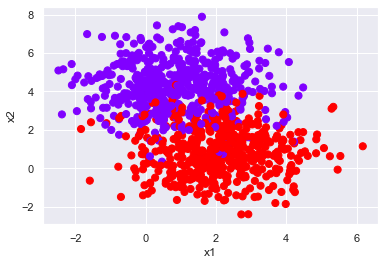

In [416]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Para aprender clasificar estos puntos, vamos a utilizar un DecisionTreeClassifier de sklearn.

Como vimos en temas anteriores, sklearn tiene muchos módulos. Uno de ellos es tree que es donde vamos a encontrar el DecisionTreeClassifier.

Primero que nada, tenemos que instanciar un decision tree:

In [417]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)

Al igual que los Imputers o Encoders que vimos anteriormente, el decision tree tiene un método fit. Este método fit nos sirve para entrenar el modelo. 

Al ser un problema de aprendizaje supervisado, tenemos X e y:

In [418]:
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

La siguiente función, nos permite ver de forma gráfica el dominio de decision que toma nuestro arbol entrenado.

No es necesario prestar atención a la función ni entender el código en este caso. Simplemente la usaremos para graficar:

In [419]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

C:\Users\Tmk\AppData\Local\Temp/ipykernel_16144/2604076473.py:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


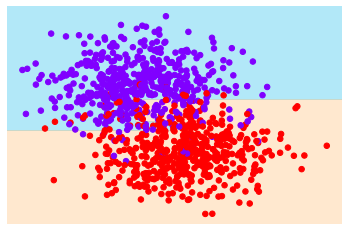

In [420]:
visualize_classifier(tree, X, y)

En este caso, podemos ver que los puntos rojos que están sobre el fondo rojo, son los que nuestro modelo clasifico correctamente. Lo mismo con los puntos azules sobre fondo azul.

Por otro lado, los puntos de un color con fondo de otro color, son puntos mal clasificados. 

En la práctica, no va a ser simple visualizar los puntos de esta manera, ya que vamos a tener multiples features y no vamos a poder graficar. Esto es un ejemplo simple con datos sintéticos.

Los modelos siempre van a tener algún porcentaje de error. Si queremos medir el porcentaje de puntos que clasificamos bien, podemos utilizar el método predict de el decision tree (que nos genera predicciones, sobre valores de X predice y) y medir la métrica accuracy score de sklearn.

Para medir accuracy score, necesitamos tener los valores reales de "y" y los que predijo nuestro modelo.

In [421]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
accuracy_score(y_pred,y)

0.905

El 90% de los datos fueron clasificados de forma correcta.

Trabajemos con un problema más real...

# Ejercicio

Vamos a trabajar con el dataset de titanic, para predecir si un pasajero sobrevivió o no. 

1) Leer el dataset titanic.csv que está en clase 16

In [422]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2) Queremos predecir si un pasajero sobrevive o no. 
¿ Cuál sería nuestro "X" o features? ¿Y nuestro "y" o target?

In [423]:
X = df[["Sex", "Age", "Fare", "Cabin", "Embarked"]]
y = df[["Survived"]]

3) ¿ Cuántas filas tiene el dataset?

In [424]:
df.shape[0]

891

4) ¿Hay nulos?

In [425]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

5) Hay columnas, que a simple vista podemos darnos cuenta que no nos sirven para predecir si un pasajero sobrevivió o no. Por ejemplo, piensan que el nombre de un pasajero puede influir en algo? Ids?

Descartar todas estas columnas.

Para no modificar el dataset original, creemos una copia antes de hacerlo y a partir de este punto trabajemos sobre la copia.

In [426]:
df = df[["Sex", "Age", "Fare", "Embarked", "Survived"]]
df

,Sex,Age,Fare,Embarked,Survived
0,male,22.0,7.2500,S,0
1,female,38.0,71.2833,C,1
2,female,26.0,7.9250,S,1
3,female,35.0,53.1000,S,1
4,male,35.0,8.0500,S,0
...,...,...,...,...,...
886,male,27.0,13.0000,S,0
887,female,19.0,30.0000,S,1
888,female,NaN,23.4500,S,0
889,male,26.0,30.0000,C,1


6) Ahora que eliminamos columnas que no nos sirven, volvamos a ver en que columnas nos quedaron nulos (en valor absoluto y en porcentaje)

In [427]:
df.isna().sum()

Sex           0
Age         177
Fare          0
Embarked      2
Survived      0
dtype: int64

7) Ahora, como vamos a usar estos datos para entrenar un modelo de machine learning que no acepta nulos, debemos completar los valores faltantes o descartar las instancias con faltantes. Tomar una decision y ejecutarlo:

In [428]:
from sklearn.impute import SimpleImputer
my_simple_imputer = SimpleImputer(missing_values = np.nan, strategy = "median")

In [429]:
df["Age"] = my_simple_imputer.fit_transform(df[["Age"]])

C:\Users\Tmk\AppData\Local\Temp/ipykernel_16144/3014553652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = my_simple_imputer.fit_transform(df[["Age"]])


In [430]:
df = df[df["Embarked"].notnull()]

In [431]:
df = df.reset_index(drop=True)

In [432]:
df.isna().sum()

Sex         0
Age         0
Fare        0
Embarked    0
Survived    0
dtype: int64

8) Tenemos features que sean categóricas? Recuerden que un modelo de machine learning no entiene que significa "male" o "female". Por lo tanto, tenemos que aplicar algún encoder a estos datos.

Listar las variables categóricas y aplicarles el encoder que mejor se ajuste según su criterio:

In [433]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
onehot = pd.DataFrame(ohe.fit_transform(df[["Sex"]]), columns= ["Sex_Female", "Sex_Male"])
onehot


,Sex_Female,Sex_Male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
884,0.0,1.0
885,1.0,0.0
886,1.0,0.0
887,0.0,1.0


In [434]:
df = df.drop("Sex", axis=1)
df = pd.concat([df, onehot], axis=1)
df

,Age,Fare,Embarked,Survived,Sex_Female,Sex_Male
0,22.0,7.2500,S,0,0.0,1.0
1,38.0,71.2833,C,1,1.0,0.0
2,26.0,7.9250,S,1,1.0,0.0
3,35.0,53.1000,S,1,1.0,0.0
4,35.0,8.0500,S,0,0.0,1.0
...,...,...,...,...,...,...
884,27.0,13.0000,S,0,0.0,1.0
885,19.0,30.0000,S,1,1.0,0.0
886,28.0,23.4500,S,0,1.0,0.0
887,26.0,30.0000,C,1,0.0,1.0


In [435]:
onehot2 = pd.DataFrame(ohe.fit_transform(df[["Embarked"]]), columns=["Embarked_Cherbourg", "Embarked_Queenstown", "Embarked_Southampton"])
onehot2

,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


In [436]:
df = pd.concat([df, onehot2], axis=1)

In [437]:
df.drop("Embarked", axis= 1, inplace=True)

In [438]:
df

,Age,Fare,Survived,Sex_Female,Sex_Male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,22.0,7.2500,0,0.0,1.0,0.0,0.0,1.0
1,38.0,71.2833,1,1.0,0.0,1.0,0.0,0.0
2,26.0,7.9250,1,1.0,0.0,0.0,0.0,1.0
3,35.0,53.1000,1,1.0,0.0,0.0,0.0,1.0
4,35.0,8.0500,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
884,27.0,13.0000,0,0.0,1.0,0.0,0.0,1.0
885,19.0,30.0000,1,1.0,0.0,0.0,0.0,1.0
886,28.0,23.4500,0,1.0,0.0,0.0,0.0,1.0
887,26.0,30.0000,1,0.0,1.0,1.0,0.0,0.0


9) ¿Alguna de las features tiene outliers? En caso de ver outliers, tomar alguna desición con lo que sabemos para limpiarlos. Una opción puede ser simplemente descartar estas observaciones.

<AxesSubplot:>

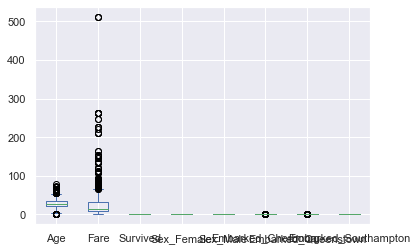

In [439]:
df.plot.box()

In [440]:
q3_age, q1_age = df["Age"].quantile([0.75, 0.25])
iqr_age = q3_age - q1_age
min_age = q1_age - (iqr_age*1.5)
max_age = q3_age + (iqr_age*1.5)
df = df [(df["Age"] > q1_age) & (df["Age"] < q3_age)]

q3_fare, q1_fare = df["Fare"].quantile([0.75, 0.25])
iqr_fare = q3_fare - q1_fare
min_fare = q1_fare - (iqr_fare*1.5)
max_fare = q3_fare + (iqr_fare*1.5)
df = df [(df["Fare"] > q1_fare) & (df["Fare"] < q3_fare)]

<AxesSubplot:>

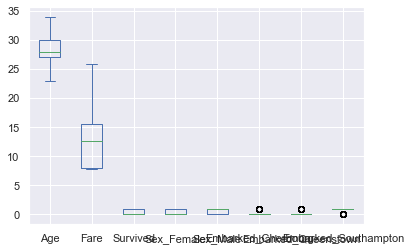

In [441]:
df.plot.box()

10) Ahora que tenemos nuestros datos más limpios, tenemos que analizar los datos para ver que features pueden ayudarnos a predecir si un pasajero sobrevivió o no. (Empezamos la etapa de EDA del proyecto)

Primero que nada queremos saber como están distribuidas las clases que queremos predecir. ¿ Qué porcentaje de pasajeros sobrevivió ? 

Graficar con un countplot y luego hacer un value counts.

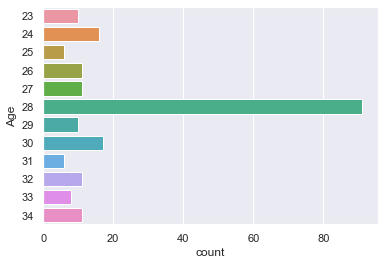

In [442]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(y = df["Age"].astype(int), data=df)

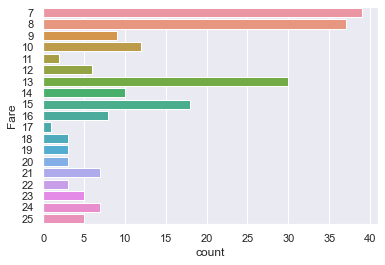

In [443]:
ax = sns.countplot(y = df["Fare"].astype(int), data=df)

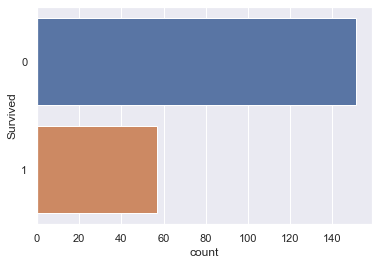

In [444]:
ax = sns.countplot(y = df["Survived"].astype(int), data=df)

In [445]:
df["Survived"].value_counts()

0    151
1     57
Name: Survived, dtype: int64

Siempre que vayamos a entrenar un modelo de machine learning, tenemos que tomar como punto de partida lo que se conoce como un "baseline". Un baseline, sería buscar una solución simple al problema sin gastarnos en hacer ningún modelo predictivo o alguna solución compleja. Por ejemplo, sabiendo que la mayor parte de los pasajeros no sobrevivieron, nuestro baseline podría ser predecir siempre 0. De esta forma, el accuracy score que obtendríamos sería igual al porcentaje de no sobrevivientes.

Luego, entrenaremos nuestro modelo y compararemos el accuracy score del modelo contra el del baseline. De esta forma, podemos comparar nuestro modelo contra algo para tomar una dimensión de lo que significa la métrica que obtenemos.

Si nuestro accuracy score es > a el porcentaje de pasajeros que murieron, podemos decir que nuestro modelo es al menos aceptable. Si nuestro modelo obtiene un score peor a ese, quiere decir que no sirve y sería mejor predecir siempre 0.

11) Plotear la correlación entre las variables. Que el gráfico sea simple de ver (buen tamaño, anotado, solo la diagonal de abajo, etc).

¿Hay alguna correlación que ya se esperaban ver? ¿Alguna correlación sin sentido?





<AxesSubplot:>

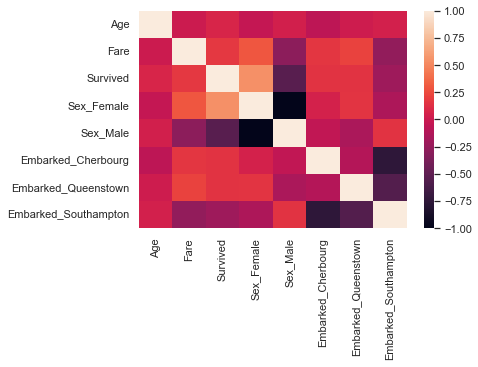

In [446]:
sns.heatmap(df.corr())

Esperaba ver que haya correlación negativa entre Survived y Sex_Male. Es interesante ver la correlación negativa que se presenta entre Survived y Embarked_Southampton

12) ¿ Qué variables tomarían para la primer versión de el modelo ? 
Si necesitan graficar o investigar algo más para decidir, haganlo.

Ahora, selecciones UNICAMENTE 2 de esas variables y estas van a ser las que utilicemos para entrenar el primer modelo.

Guardar en una variable llamada X una copia de las columnas del dataset que utilizaremos como X (las 2 features que usaremos para predecir).

In [447]:
df_X = df[["Embarked_Southampton", "Sex_Male"]]
df_X

,Embarked_Southampton,Sex_Male
2,1.0,0.0
5,0.0,1.0
8,1.0,0.0
17,1.0,1.0
18,1.0,0.0
...,...,...
876,1.0,1.0
879,1.0,1.0
881,1.0,1.0
884,1.0,1.0


13) Guardar en una variable llamada y, nuestro target (survived)

In [448]:
df_y = df["Survived"]
df_y

2      1
5      0
8      1
17     1
18     0
      ..
876    0
879    0
881    0
884    0
886    0
Name: Survived, Length: 208, dtype: int64

14) Ahora que tenemos X e y, podemos definir nuestro decision tree classifier y entrenarlo. Entrenar el clasificador:

In [449]:
tree_titanic = DecisionTreeClassifier()

In [450]:
tree_titanic.fit(df_X, df_y)

DecisionTreeClassifier()

15) Ahora, con nuestro modelo entrenado, generar las predicciones sobre el X que generamos anteriormente:

In [451]:
y_titanic_predict = tree_titanic.predict(df_X)

16) ¿Qué accuracy score obtenemos? Recuerden que tienen los valores reales de y almacenados en la variable "y" y también tienen lo que predijeron en el punto anterior. Utilizando la función accuracy_score de sklearn pueden obtener la métrica.

In [452]:
accuracy_score(df_y,y_titanic_predict)

0.8076923076923077

17) Ahora, vuelvan a entrenar el modelo, pero utilizando un nuevo X que contenga TODAS las features que les parezcan relevantes (pueden ser todas las del dataset).

In [453]:
tree_titanic.fit(df.drop("Survived", axis= 1), df_y)

DecisionTreeClassifier()

18) Medir el accuracy score de este modelo entrenado con todas las variables. ¿Ven alguna mejora?

In [454]:
y_titanic_full_predict = tree_titanic.predict(df.drop("Survived", axis= 1))

In [455]:
accuracy_score(df_y,y_titanic_full_predict)

0.9807692307692307

Tomando todas las variables el modelo mejora considerablemente.